Lab 2: Базові алгоритми навчання без учителя та обробка текстових даних (Scikit-learn lib)

1. Зниження розмірності і візуалізація даних

Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns


url='https://drive.google.com/file/d/1xKY4nnik_Fon4D6eBdJ7TCzDTlzKWPyJ/view?usp=sharing'
url_='https://drive.google.com/uc?id=' + url.split('/')[-2]

data = pd.read_csv(url_, sep=';')

data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [2]:
data = data.drop([
    'cap-surface',
    'does-bruise-or-bleed',
    'gill-spacing',
    'spore-print-color',
    'habitat', 
    'spore-print-color',
    'veil-color',
    'veil-type' ,
    'stem-surface', 
    'stem-root'], axis = 1)
data.head()

,class,cap-diameter,cap-shape,cap-color,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,season
0,p,15.26,x,o,e,w,16.95,17.09,w,t,g,w
1,p,16.60,x,o,e,w,17.99,18.19,w,t,g,u
2,p,14.07,x,o,e,w,17.80,17.74,w,t,g,w
3,p,14.17,f,e,e,w,15.77,15.98,w,t,p,w
4,p,14.64,x,o,e,w,16.53,17.20,w,t,p,w


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            61069 non-null  object 
 1   cap-diameter     61069 non-null  float64
 2   cap-shape        61069 non-null  object 
 3   cap-color        61069 non-null  object 
 4   gill-attachment  51185 non-null  object 
 5   gill-color       61069 non-null  object 
 6   stem-height      61069 non-null  float64
 7   stem-width       61069 non-null  float64
 8   stem-color       61069 non-null  object 
 9   has-ring         61069 non-null  object 
 10  ring-type        58598 non-null  object 
 11  season           61069 non-null  object 
dtypes: float64(3), object(9)
memory usage: 5.6+ MB


In [4]:
data.isna().sum()

class                 0
cap-diameter          0
cap-shape             0
cap-color             0
gill-attachment    9884
gill-color            0
stem-height           0
stem-width            0
stem-color            0
has-ring              0
ring-type          2471
season                0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])
data.head()

,class,cap-diameter,cap-shape,cap-color,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,season
0,1,15.26,6,6,2,10,16.95,17.09,11,1,2,3
1,1,16.60,6,6,2,10,17.99,18.19,11,1,2,2
2,1,14.07,6,6,2,10,17.80,17.74,11,1,2,3
3,1,14.17,2,1,2,10,15.77,15.98,11,1,5,3
4,1,14.64,6,6,2,10,16.53,17.20,11,1,5,3


In [6]:
X = data.drop('class', axis=1)
y = data['class']

PCA

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
X_std = pd.DataFrame(data_scaled, columns=X.columns)

PCA 

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [9]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.20972959 0.36077664]


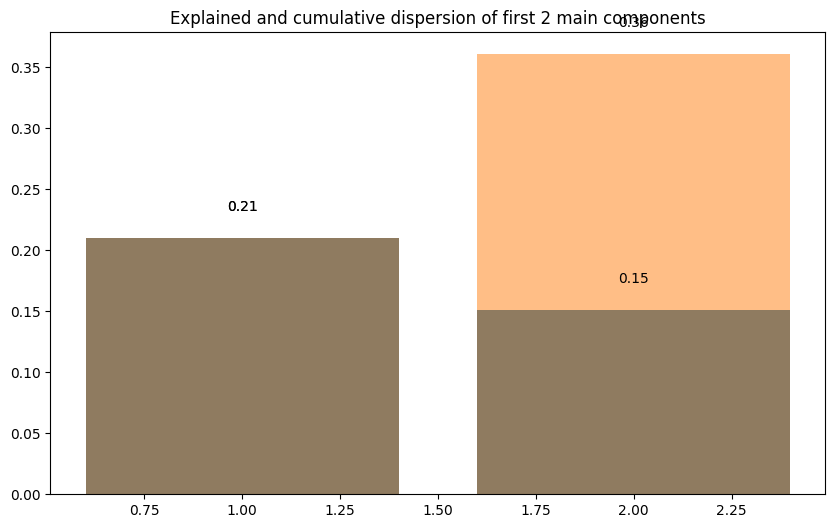

In [10]:
plt.figure(figsize=(10, 6))

plt.title('Explained and cumulative dispersion of first 2 main components')

plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=1, label='Explained variance')

plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, alpha=0.5, label='Cumulative Explained Variance')

for i, v in enumerate(explained_variance):
    plt.text(i + 1, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

for i, v in enumerate(cumulative_variance):
    plt.text(i + 1, v + 0.02, f'{v:.2f}', ha='center', va='bottom')


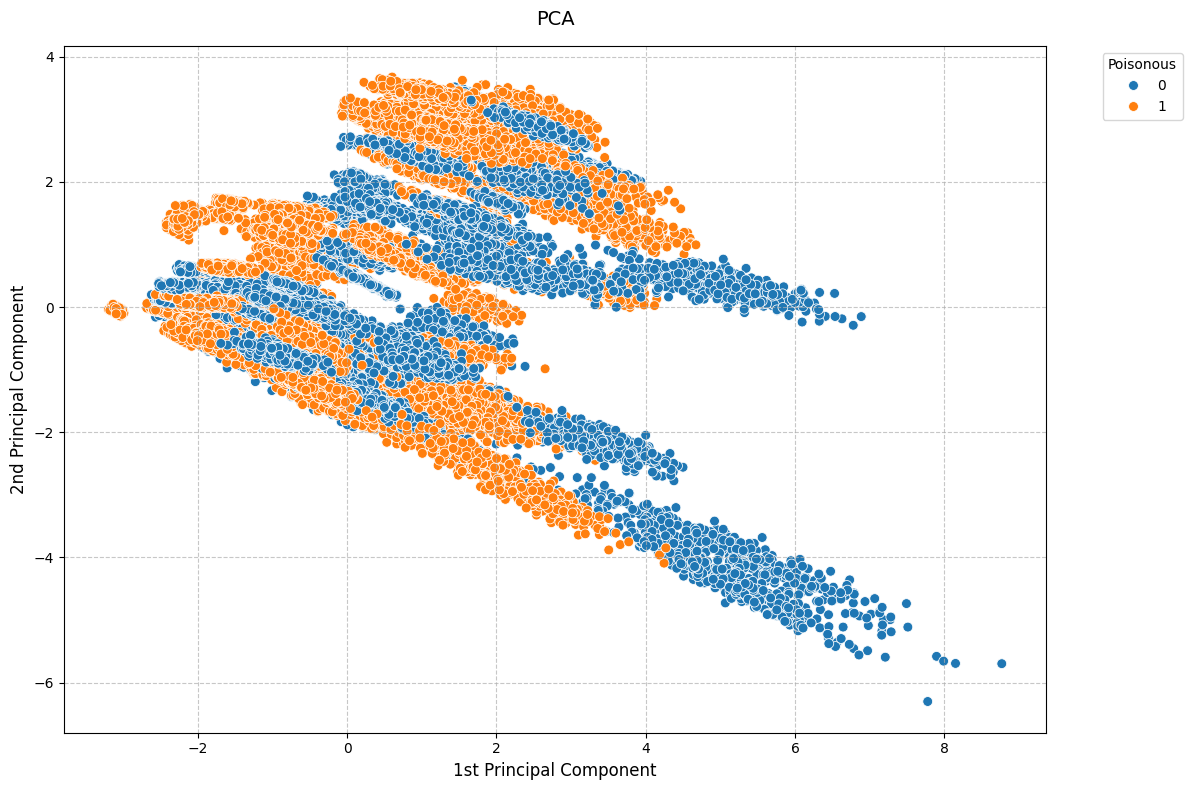

In [11]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, s=50, alpha=1)  

plt.title('PCA', fontsize=14, pad=15)
plt.xlabel('1st Principal Component', fontsize=12)
plt.ylabel('2nd Principal Component', fontsize=12)

plt.legend(title='Poisonous', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

TSNE

In [14]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_std)

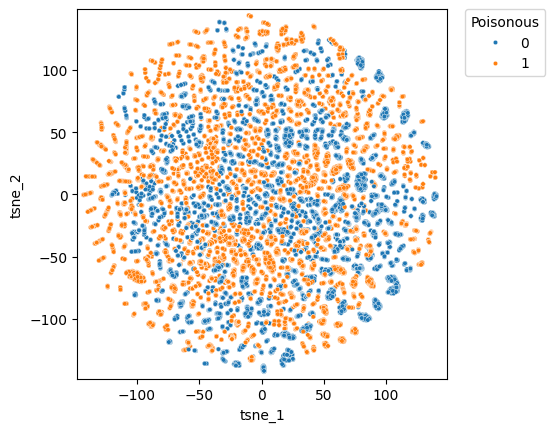

In [15]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(title='Poisonous', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)